In [1]:
import pandas as pd
#import tellurium as te
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit 
import seaborn as sns
data=pd.read_csv('0016.csv')
data2=pd.read_csv('0035.csv')


In [2]:
data['mock/mock_IL6']=data['IL6-Mock']/data['Mock']


(0.0, 6.0)

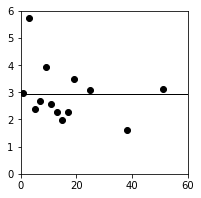

In [3]:
figure= plt.figure(figsize=(3,3))

plt.plot(data["Week"][1:],data['mock/mock_IL6'][1:],'ko')
m=np.mean(data['mock/mock_IL6'][1:])
plt.axhline(y=m,color='k', lw=1)
plt.xlim(0,60)
plt.ylim(0,6)
# plt.savefig('ratio_s5B.pdf')

In [4]:
#llpc-mock
#r is adjust to 0.75 based on later experiment showed mock w/o IL6 has lower secretion rate 
def test(x, N0, b): 
    r=0.1
    l=0.495


    return r*N0*(np.exp(-b*x)-np.exp(-l*x))/(l-b)
                        

                        

In [5]:
#llpc-IL6
def test6(x, N0, b): 
    r=0.1
    l=0.495


    return r*N0*(np.exp(-b*x)-np.exp(-l*x))/(l-b)
                        


In [6]:
# Mock_dynamic function for adjusting llpc t0
# r is adjust to 0.75 based on later experiment showed mock w/o IL6 has lower secretion rate 

def ans_x(param):
    x=x0[2:]*7-2.9*7

    r=0.1
    l=0.495
   
    G=r*param[0]*(np.exp(-param[1]*x)-np.exp(-l*x))/(l-param[1])
    return G

In [7]:
# IL6_dynamic function for adjusting llpc t0
def ans_x6(param):
    x=x0[2:]*7-2.9*7

    r=0.1
    l=0.495
   
    G=r*param[0]*(np.exp(-param[1]*x)-np.exp(-l*x))/(l-param[1])
    return G

In [8]:
#sspc_mock
#adjust r to 0.75 
def test_s(x, N0, b): 
    r=0.1
    l=0.495


    return r*N0*(np.exp(-b*x)-np.exp(-l*x))/(l-b)

In [9]:
#sspc_IL6
def test_s6(x, N0, b): 
    r=0.1
    l=0.495


    return r*N0*(np.exp(-b*x)-np.exp(-l*x))/(l-b)

In [10]:
#slpc_function_mock
#adjust r to 0.75 
def ans_s(param):
    x=np.linspace(0,357,1000)

    l=0.495
    r1=0.1
   
    G= r1*param[0]*(np.exp(-param[1]*x)-np.exp(-l*x))/(l-param[1])
    return G

In [11]:
#slpc_function_IL6
def ans_s6(param):
    x=np.linspace(0,357,1000)

    l=0.495
    r1=0.1
   
    G= r1*param[0]*(np.exp(-param[1]*x)-np.exp(-l*x))/(l-param[1])
    return G

In [12]:
#llpc_function_mock
#adjust r to 0.75 
def ans_l(param):
    x=np.linspace(0,357,1000)
    r=0.1
    l=0.495
   
    G= r*param[0]*(np.exp(-param[1]*x)-np.exp(-l*x))/(l-param[1])# + r1*param[2]*(np.exp(-param[3]*x2)-np.exp(-l*x2))/(l-param[3])
    return G

In [13]:
#llpc_function_IL6

def ans_l6(param):
    x=np.linspace(0,357,1000)
    r=0.1
    l=0.495
   
    G= r*param[0]*(np.exp(-param[1]*x)-np.exp(-l*x))/(l-param[1])# + r1*param[2]*(np.exp(-param[3]*x2)-np.exp(-l*x2))/(l-param[3])
    return G

In [14]:
#fitting for llpc_mock
x0 = data['Week']
x1 = x0[6:]*7
x2 = x1-2.9*7


y1= data['Mock_1'][x1.index]
y2= data['Mock_2'][x1.index]
y3= data['Mock_3'][x1.index][:-1]
y4= data['Mock_4'][x1.index]

param1, param_cov1 = curve_fit(test, x2, y1, bounds=([100,0.001],[50000,0.01]))
param2, param_cov2 = curve_fit(test, x2, y2, bounds=([100,0.001],[50000,0.01]))
param3, param_cov2 = curve_fit(test, x2[:-1], y3, bounds=([100,0.001],[50000,0.01]))
param4, param_cov2 = curve_fit(test, x2, y4, bounds=([100,0.001],[50000,0.01]))



In [15]:
#fitting for slpc_mock

x1 = x0[2:]*7
x2 = x1-2.9*7


y1s= data['Mock_1'][x1.index]-ans_x(param1)
y2s= data['Mock_2'][x1.index]-ans_x(param2)
y3s= (data['Mock_3'][x1.index]-ans_x(param3))[:-1]
y4s= data['Mock_4'][x1.index]-ans_x(param4)
y1s= np.where(y1s<0, 0, y1s) 
y2s= np.where(y2s<0, 0, y2s) 
y3s= np.where(y3s<0, 0, y3s) 
y4s= np.where(y4s<0, 0, y4s)

param1s, param_cov1s = curve_fit(test_s, x2, y1s, bounds=([100,0.01],[1000000,1]))
param2s, param_cov2s = curve_fit(test_s, x2, y2s, bounds=([100,0.01],[1000000,1]))
param3s, param_cov2s = curve_fit(test_s, x2[:-1], y3s, bounds=([100,0.01],[50000,0.08]))
param4s, param_cov2s = curve_fit(test_s, x2, y4s, bounds=([100,0.01],[1000000,1]))

In [16]:
#fitting llpc_IL6 
x1 = x0[6:]*7
x2 = x1-2.9*7


y5= data['IL6_1'][x1.index]
y6= data['IL6_2'][x1.index]
y7= data['IL6_3'][x1.index]
y8= data['IL6_4'][x1.index]
y8= np.append(y8[:5],y8[6:])
x8= np.append(x2[:5],x2[6:])

param5, param_cov5 = curve_fit(test6, x2, y5, bounds=([100,0.001],[100000,0.01]))
param6, param_cov6 = curve_fit(test6, x2, y6, bounds=([100,0.001],[100000,0.01]))
param7, param_cov7 = curve_fit(test6, x2, y7, bounds=([100,0.001],[100000,0.01]))
param8, param_cov8 = curve_fit(test6, x8, y8, bounds=([100,0.001],[100000,0.01]))

In [25]:
#fitting for slpc_il6

x0 = data['Week']
x1 = x0[2:]*7
x2 = x1-2.9*7

y5s= data['IL6_1'][x1.index]-ans_x6(param5)
y6s= data['IL6_2'][x1.index]-ans_x6(param6)
y7s= data['IL6_3'][x1.index]-ans_x6(param7)
y8s= data['IL6_4'][x1.index]-ans_x6(param8)
y8s= np.append(y8s[:9],y8s[10:])
x8s= np.append(x2[:9],x2[10:])
y5s= np.where(y5s<0, 0, y5s) 
y6s= np.where(y6s<0, 0, y6s) 
y7s= np.where(y7s<0, 0, y7s) 
y8s= np.where(y8s<0, 0, y8s)


param5s, param_cov5s = curve_fit(test_s6, x2, y5s, bounds=([100,0.01],[300000,0.1]))
param6s, param_cov6s = curve_fit(test_s6, x2, y6s, bounds=([100,0.01],[300000,0.1]))
param7s, param_cov7s = curve_fit(test_s6, x2, y7s, bounds=([100,0.01],[300000,0.1]))
param8s, param_cov8s = curve_fit(test_s6, x8s, y8s, bounds=([100,0.01],[300000,0.1]))

In [26]:
#fitting for llpc_baff w/ and w/o IL6

x0 = data['Week']
#x1 = np.array([1,11,13,15,17,19,25,38,51])
x1 = x0[6:]*7
x2 = x1-2.9*7


y9= data['BAFF_1'][x1.index][:-1]
y10= data['BAFF_2'][x1.index]
y11= data['BAFF_3'][x1.index]
y12= data['BAFF_4'][x1.index]
y13= data['BAFF_5'][x1.index]

y14= data['BAFF_IL6_1'][x1.index]
y15= data['BAFF_IL6_2'][x1.index]
y16= data['BAFF_IL6_3'][x1.index]
y17= data['BAFF_IL6_4'][x1.index]
y18= data['BAFF_IL6_5'][x1.index]


param9, param_cov9 = curve_fit(test, x2[:-1], y9, bounds=([100,0.001],[500000,0.02]))
param10, param_cov10 = curve_fit(test, x2, y10, bounds=([100,0.001],[500000,0.02]))
param11, param_cov11 = curve_fit(test, x2, y11, bounds=([100,0.001],[500000,0.02]))
param12, param_cov12 = curve_fit(test, x2, y12, bounds=([100,0.001],[500000,0.02]))
param13, param_cov13 = curve_fit(test, x2, y13, bounds=([100,0.001],[500000,0.02]))
param14, param_cov14 = curve_fit(test6, x2, y14, bounds=([100,0.001],[700000,0.02]))
param15, param_cov15 = curve_fit(test6, x2, y15, bounds=([100,0.001],[600000,0.02]))
param16, param_cov16 = curve_fit(test6, x2, y16, bounds=([100,0.001],[600000,0.02]))
param17, param_cov17 = curve_fit(test6, x2, y17, bounds=([100,0.001],[600000,0.02]))
param18, param_cov18 = curve_fit(test6, x2, y18, bounds=([100,0.001],[500000,0.02]))

In [27]:
#fitting for slpc_baff w/ and w/o IL6

x1 = x0[2:]*7
x2 = x1-2.9*7

y9s= (data['BAFF_1'][x1.index]-ans_x(param9))[:-1]
y10s= data['BAFF_2'][x1.index]-ans_x(param10)
y11s= data['BAFF_3'][x1.index]-ans_x(param11)
y12s= data['BAFF_4'][x1.index]-ans_x(param12)
y13s= data['BAFF_5'][x1.index]-ans_x(param13)

y14s= data['BAFF_IL6_1'][x1.index]-ans_x6(param14)
y15s= data['BAFF_IL6_2'][x1.index]-ans_x6(param15)
y16s= data['BAFF_IL6_3'][x1.index]-ans_x6(param16)
y17s= data['BAFF_IL6_4'][x1.index]-ans_x6(param17)
y18s= data['BAFF_IL6_5'][x1.index]-ans_x6(param18)


y9s= np.where(y9s<0, 0, y9s) 
y10s= np.where(y10s<0, 0, y10s) 
y11s= np.where(y11s<0, 0, y11s) 
y12s= np.where(y12s<0, 0, y12s)
y13s= np.where(y13s<0, 0, y13s)
y14s= np.where(y14s<0, 0, y14s)
y15s= np.where(y15s<0, 0, y15s)
y16s= np.where(y16s<0, 0, y16s)
y17s= np.where(y17s<0, 0, y17s)
y18s= np.where(y18s<0, 0, y18s)

# y3= data['BAFF'][x2.index]
# y4= data['IL6-BAFF'][x2.index]
# y2= np.append(data['IL6-Mock'],data['IL6-Mock'][5:13])
param9s, param_cov9s = curve_fit(test_s, x2[:-1], y9s, bounds=([100,0.01],[5000000,0.5]))
param10s, param_cov10s = curve_fit(test_s, x2, y10s, bounds=([100,0.01],[5000000,0.5]))
param11s, param_cov11s = curve_fit(test_s, x2, y11s, bounds=([100,0.01],[5000000,0.5]))
param12s, param_cov12s = curve_fit(test_s, x2, y12s, bounds=([100,0.01],[5000000,0.5]))
param13s, param_cov13s = curve_fit(test_s, x2, y13s, bounds=([100,0.01],[5000000,0.5]))
param14s, param_cov14s = curve_fit(test_s6, x2, y14s, bounds=([100,0.01],[5000000,0.5]))
param15s, param_cov15s = curve_fit(test_s6, x2, y15s, bounds=([100,0.01],[5000000,0.5]))
param16s, param_cov16s = curve_fit(test_s6, x2, y16s, bounds=([100,0.01],[5000000,0.5]))
param17s, param_cov17s = curve_fit(test_s6, x2, y17s, bounds=([100,0.01],[5000000,0.5]))
param18s, param_cov18s = curve_fit(test_s6, x2, y18s, bounds=([100,0.01],[5000000,0.5]))

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
time= pd.read_csv('timecourse_0016_.csv')

time= time.set_index('sample')
time1 = time.iloc[0:112]
time2 = time.iloc[112:]

In [29]:
time1_m=time1[time1['Condition']=='Mock']
time2_m=time2[time2['Condition']=='BAFF']


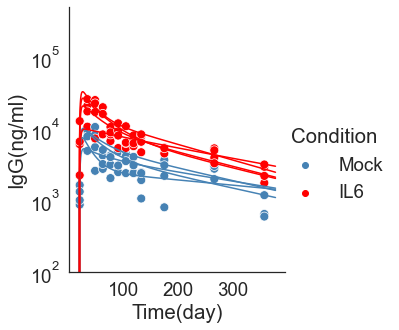

In [30]:
# plot the dynamic fitting result and real data

x=np.linspace(0,357,1000)+2.9*7
sns.set(font_scale=1.7) 
sns.set_style("white")
sns.relplot(x="Time(day)", y="IgG(ng/ml)",
            hue="Condition",
            data=time1,kind='scatter',s=80,palette=('steelblue','red'))


# sns.lineplot(x="Time(day)", y="IgG(ng/ml)",palette=('steelblue','red'),
#             hue="Condition",
#             data=time1)#, ci=100)
# sns.relplot(x="Time(day)", y="BAFF(pg/ml)",
#             hue="Condition",
#             data=time2,kind='scatter',s=80,palette=('steelblue','red'))


# sns.lineplot(x="Time(day)", y="BAFF(pg/ml)",palette=('steelblue','red'),
#             hue="Condition",
#             data=time2)#, ci=100)
plt.plot(x,ans_l(param1)+ans_s(param1s),'-',color='steelblue',label="simulation_Mock")

plt.plot(x,ans_l(param2)+ans_s(param2s),'-',color='steelblue')

plt.plot(x,ans_l(param3)+ans_s(param3s),'-',color='steelblue')
plt.plot(x,ans_l(param4)+ans_s(param4s),'-',color='steelblue')

plt.plot(x,ans_l(param5)+ans_s(param5s),'-',color='red',label="simulation_IL6")

plt.plot(x,ans_l(param6)+ans_s(param6s),'-',color='red')

plt.plot(x,ans_l(param7)+ans_s(param7s),'-',color='red')
plt.plot(x,ans_l(param8)+ans_s(param8s),'-',color='red')

# plt.plot(x,ans_l(np.squeeze(np.asarray(mean1)))+ans_s(np.squeeze(np.asarray(mean1s))),'--',linewidth=2,alpha=0.8, color='blue',label='mean_simulation')
# plt.plot(x,ans_l(np.squeeze(np.asarray(mean2)))+ans_s(np.squeeze(np.asarray(mean2s))),'--',linewidth=2,alpha=0.8, color='red',label='mean_simulation')
plt.legend().set_visible(False)
plt.ylim(100,500000)
# plt.xlim(-10,370)
# plt.legend()
plt.yscale('log')
# plt.savefig('fig3e.pdf')

<Figure size 360x360 with 0 Axes>

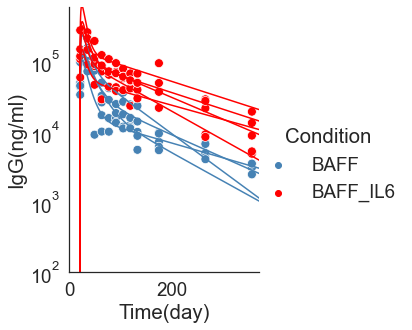

In [31]:
plt.figure(figsize=(5,5))
sns.set(font_scale=1.7) 
sns.set_style("white")

x=np.linspace(0,357,1000)+2.9*7


# sns.relplot(x="Time(day)", y="IgG(ng/ml)",
#             hue="Condition",
#             data=time1,kind='scatter',s=80,palette=('steelblue','red') )


# plt.plot(x,ans_l(param1)+ans_s(param1s),'-',color='steelblue')

# plt.plot(x,ans_l(param2)+ans_s(param2s),'-',color='steelblue')

# plt.plot(x,ans_l(param3)+ans_s(param3s),'-',color='steelblue')
# plt.plot(x,ans_l(param4)+ans_s(param4s),'-',color='steelblue')

# plt.plot(x,ans_l6(param5)+ans_s6(param5s),'-',color='red')
# plt.plot(x,ans_l6(param6)+ans_s6(param6s),'-',color='red')
# plt.plot(x,ans_l6(param7)+ans_s6(param7s),'-',color='red')
# plt.plot(x,ans_l6(param8)+ans_s6(param8s),'-',color='red')
# #plt.yscale("log")





sns.relplot(x="Time(day)", y="IgG(ng/ml)",
            hue="Condition",
            data=time2,kind='scatter',s=80,palette=('steelblue','red') )


# sns.lineplot(x="Time", y="IgG",
#             hue="Condition",
#             data=time2, ci=100)




# plt.plot(x,ans_l(param9)+ans_s(param9s),'-',color='steelblue',label="simulation_BAFF")

plt.plot(x,ans_l(param10)+ans_s(param10s),'-',color='steelblue')

plt.plot(x,ans_l(param11)+ans_s(param11s),'-',color='steelblue')
plt.plot(x,ans_l(param12)+ans_s(param12s),'-',color='steelblue')
plt.plot(x,ans_l(param13)+ans_s(param13s),'-',color='steelblue')

plt.plot(x,ans_l6(param14)+ans_s6(param14s),'-',color='red',label="simulation_BAFF_IL6")

plt.plot(x,ans_l6(param15)+ans_s6(param15s),'-',color='red')

plt.plot(x,ans_l6(param16)+ans_s6(param16s),'-',color='red')
plt.plot(x,ans_l6(param17)+ans_s6(param17s),'-',color='red')
plt.plot(x,ans_l6(param18)+ans_s6(param18s),'-',color='red')

plt.yscale('log')
plt.ylim(100,600000)  
plt.xlim(0,370)    

# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend().set_visible(False)
# plt.savefig('fig3f.pdf')
# plt.plot(x,ans_l(np.squeeze(np.asarray(mean1)))+ans_s(np.squeeze(np.asarray(mean1s))),'--',linewidth=2,alpha=0.8, color='blue',label='mean_simulation')
# plt.plot(x,ans_l(np.squeeze(np.asarray(mean2)))+ans_s(np.squeeze(np.asarray(mean2s))),'--',linewidth=2,alpha=0.8, color='red',label='mean_simulation')


In [33]:
mat1=np.mat([param1,param2,param3,param4])
mat1s=np.mat([param1s,param2s,param3s,param4s])
mean1=np.mean(mat1,0)
mean1s=np.mean(mat1s,0)
mat2=np.mat([param5,param6,param7,param8])
mat2s=np.mat([param5s,param6s,param7s,param8s])
mean2=np.mean(mat2,0)
mean2s=np.mean(mat2s,0)
print('Mock:',np.mean(mat1,0),np.mean(mat1s,0))
print('IL6:',np.mean(mat2,0),np.mean(mat2s,0))
mat3=np.mat([param9,param10,param11,param12,param13])
mat3s=np.mat([param9s,param10s,param11s,param12s,param13])
mean3=np.mean(mat3,0)
mean3s=np.mean(mat3s,0)
mat4=np.mat([param14,param15,param16,param17,param18])
mat4s=np.mat([param14s,param15s,param16s,param17s,param18s])
mean4=np.mean(mat4,0)
mean4s=np.mean(mat4s,0)
print('BAFF:',mean3,mean3s)
print('BAFF_IL6:',mean4, mean4s)

Mock: [[2.09151137e+04 3.11766329e-03]] [[2.55266609e+04 3.38741966e-02]]
IL6: [[5.40125847e+04 4.24313718e-03]] [[7.41048467e+04 2.77446618e-02]]
BAFF: [[2.19369957e+05 9.59450132e-03]] [[6.87839271e+05 4.77949050e-02]]
BAFF_IL6: [[4.94429133e+05 6.39780734e-03]] [[2.02203580e+06 1.17134404e-01]]


In [34]:
from scipy import stats
print ('LLPC')
stat, p = stats.ttest_ind(np.squeeze(np.asarray(mat1))[:,0], np.squeeze(np.asarray(mat2))[:,0])

print('IL6_N0: stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Nonsignigicant')
else:
	print('significant')
    
stat, p = stats.ttest_ind(np.squeeze(np.asarray(mat1))[:,1], np.squeeze(np.asarray(mat2))[:,1])

print('IL6_beta: stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
	print('Nonsignigicant')
else:
	print('significant')

stat, p = stats.ttest_ind(np.squeeze(np.asarray(mat3))[:,0], np.squeeze(np.asarray(mat4))[:,0],equal_var=False)

print('BAFF_IL6_N0: stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
	print('Nonsignigicant')
else:
	print('significant')
    
stat, p = stats.ttest_ind(np.squeeze(np.asarray(mat3))[:,1], np.squeeze(np.asarray(mat4))[:,1],equal_var=False)

print('BAFF_IL6_beta:stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Nonsignigicant')
else:
	print('significant')

LLPC
IL6_N0: stat=-4.549, p=0.004
significant
IL6_beta: stat=-1.678, p=0.144
Nonsignigicant
BAFF_IL6_N0: stat=-3.056, p=0.016
significant
BAFF_IL6_beta:stat=1.705, p=0.140
Nonsignigicant


In [35]:
print ('LLPC')

stat, p = stats.ttest_ind(np.squeeze(np.asarray(mat1))[:,0], np.squeeze(np.asarray(mat3))[:,0], equal_var = False)
print('BAFFs effect_N0: stat=%.3f, p=%.3f' % (stat, p))
# print (np.squeeze(np.asarray(mat1))[:,0])
# print (np.squeeze(np.asarray(mat3))[:,0])
if p > 0.05:
	print('Nonsignigicant')
else:
	print('significant')
stat, p = stats.ttest_ind(np.squeeze(np.asarray(mat1))[:,1], np.squeeze(np.asarray(mat3))[:,1], equal_var = False)
print('BAFFs effect_beta: stat=%.3f, p=%.3f' % (stat, p))
# print (np.squeeze(np.asarray(mat1))[:,1])
# print (np.squeeze(np.asarray(mat3))[:,1])
if p > 0.05:
	print('Nonsignigicant')
else:
	print('significant')



LLPC
BAFFs effect_N0: stat=-3.205, p=0.032
significant
BAFFs effect_beta: stat=-3.681, p=0.015
significant


In [36]:
import re
name = "param#s"
fmt = re.sub(r"#+",lambda m: r"{{:0{}d}}".format(len(m.group(0))),name)
param = []
for i in range(1,19):
    param.append(fmt.format(i))
    #print (fmt.format(i))

print (*param, sep =', ')
#[i.replace("'", "") for i in param]
#param
#np.asarray(param

param1s, param2s, param3s, param4s, param5s, param6s, param7s, param8s, param9s, param10s, param11s, param12s, param13s, param14s, param15s, param16s, param17s, param18s


In [37]:
param=[param1, param2, param3, param4, param5, param6, param7, param8, param9, param10, param11, param12, param13, param14, param15, param16, param17, param18]
param=np.asarray(param)
param_s=[param1s, param2s, param3s, param4s, param5s, param6s, param7s, param8s, param9s, param10s, param11s, param12s, param13s, param14s, param15s, param16s, param17s, param18s]
param_s=np.asarray(param_s)            

In [38]:
LLPC= pd.DataFrame({"N0": param[:,0],"beta":param[:,1],"IL6": ['-IL6']*4+['+IL6']*4+['BAFF/-IL6']*5+['BAFF/+IL6']*5 ,"BAFF":['Unedited']*8+['BAFF-edited']*10})
SLPC= pd.DataFrame({"N0": param_s[:,0],"beta":param_s[:,1],"IL6": ['-IL6']*4+['+IL6']*4+['BAFF/-IL6']*5+['BAFF/+IL6']*5 })
LLPC.to_csv('LLPC_eqg.csv')
SLPC.to_csv('SLPC_eqg.csv')

In [39]:
LLPC=pd.read_csv('LLPC_eqg.csv')
SLPC=pd.read_csv('SLPC_eqg.csv')


In [40]:
LLPC_noIL6=LLPC[LLPC['IL6'].str.contains('-IL6')]
LLPC_IL6=LLPC[~LLPC['IL6'].str.contains('-IL6')]

In [41]:
SLPC_noIL6=SLPC[SLPC['IL6'].str.contains('-IL6')]
SLPC_IL6=SLPC[~SLPC['IL6'].str.contains('-IL6')]

(0.0, 0.014769992473794246)

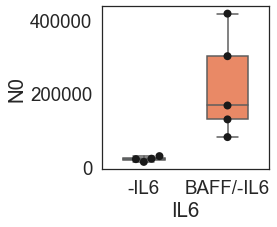

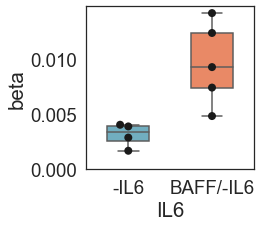

In [42]:

figure= plt.figure(figsize=(3,3))
ax = sns.swarmplot(x="IL6", y="N0", data=LLPC_noIL6, color='k',size=8)
ax = sns.boxplot(x="IL6", y="N0", data=LLPC_noIL6,palette=('c','coral'),width=0.5)
# plt.savefig('figS5_l_N0_noIL6.pdf')

figure= plt.figure(figsize=(3,3))
ax = sns.swarmplot(x="IL6", y="beta", data=LLPC_noIL6, color='k',size=8)
ax = sns.boxplot(x="IL6", y='beta', data=LLPC_noIL6,palette=('c','coral'),width=0.5)
plt.ylim(-0)
# plt.savefig('figS5_l_beta_noIL6.pdf')

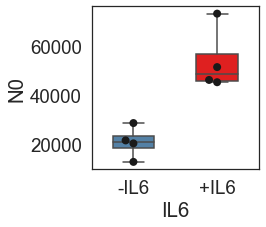

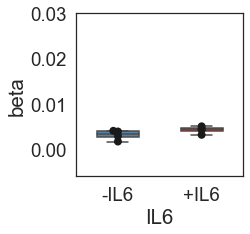

In [43]:
figure= plt.figure(figsize=(3,3))


ax = sns.swarmplot(x="IL6", y="N0", data=LLPC.iloc[:8], color='k',size=8)
ax = sns.boxplot(x="IL6", y="N0", data=LLPC.iloc[:8],palette=('steelblue','red'),width=0.5)
# plt.ylim(0,80000)
plt.savefig('fig3H1_eqg.pdf')
figure= plt.figure(figsize=(3,3))
ax = sns.swarmplot(x="IL6", y="beta", data=LLPC.iloc[:8], color='k',size=8)
ax = sns.boxplot(x="IL6", y='beta', data=LLPC.iloc[:8],palette=('steelblue','red'),width=0.5)
plt.ylim(-0.006,0.03)
plt.savefig('fig3G1_eqg.pdf')
# 

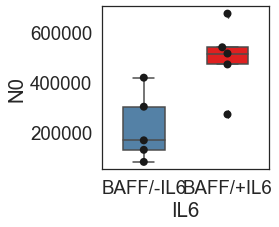

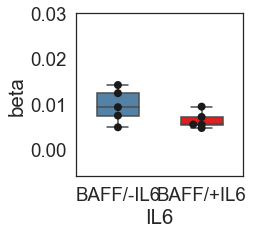

In [44]:
figure= plt.figure(figsize=(3,3))


ax = sns.swarmplot(x="IL6", y="N0", data=LLPC.iloc[8:], color='k',size=8)
ax = sns.boxplot(x="IL6", y="N0", data=LLPC.iloc[8:],palette=('steelblue','red'),width=0.5)

plt.savefig('fig3H2_eqg.pdf')

# plt.ylim(0,800000)
figure= plt.figure(figsize=(3,3))
ax = sns.swarmplot(x="IL6", y="beta", data=LLPC.iloc[8:], color='k',size=8)
ax = sns.boxplot(x="IL6", y='beta', data=LLPC.iloc[8:],palette=('steelblue','red'),width=0.5)
plt.ylim(-0.006,0.03)
plt.savefig('fig3G2_eqg.pdf')
